In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titleweight'] = 'bold'
import numpy as np

In [13]:
class Fuzzification:
    dx = 0.001 # dx for linguistic variable function
    
    @staticmethod
    def trapezoid(z,c_l,tc,Tc,c_u):
        """
        Trapezoid function that can be used to create linguistic values or normalization curves.
        
        Rule #1 of Fuzzy System: Completeness of Inputs - Make sure z covers the full universe of discourse.
        """
        return np.piecewise(z,
                           [z<=c_l, z>=c_u, (z>c_l)&(z<tc)            , (z>=tc)&(z<=Tc), (z>Tc)&(z<c_u)],
                           [0     , 0     , lambda z: (z-c_l)/(tc-c_l), 1              , lambda z: (c_u-z)/(c_u-Tc)])
    
    @classmethod
    def wms(cls):
        """
        Linguistic Variable WMS
        """
        x=np.arange(0,1,cls.dx)
        medium_val = 0.7 # or 0.6?
        df = pd.DataFrame(data = {'w':Fuzzification.trapezoid(x,0,0,0,medium_val),
                                  'm':Fuzzification.trapezoid(x,0,medium_val,medium_val,1),
                                  's':Fuzzification.trapezoid(x,medium_val,1,1,1)},
                          index = x)
        Fuzzification.check_ruspini_partition(df)
        Fuzzification.check_consistency(df)
        return df
    
    @classmethod
    def vbbagvg(cls):
        """
        Linguistic Variable VBBAGVG
        """
        x=np.arange(0,1,cls.dx)
        df = pd.DataFrame(data = {'vb':Fuzzification.trapezoid(x,0,0,0,0.25),
                                  'b' :Fuzzification.trapezoid(x,0,0.25,0.25,0.5),
                                  'a' :Fuzzification.trapezoid(x,0.25,0.5,0.5,0.75),
                                  'g' :Fuzzification.trapezoid(x,0.5,0.75,0.75,1),
                                  'vg':Fuzzification.trapezoid(x,0.75,1,1,1)},
                          index = x)
        Fuzzification.check_ruspini_partition(df)
        Fuzzification.check_consistency(df)
        return df
    
    @staticmethod
    def check_ruspini_partition(df):
        """
        Special case of Rule #2 of Fuzzy System: Consistency of Unions for WMS and VBBAGVG
        """
        assert any(df.sum(axis='columns').apply(lambda x: round(x,2)==1)) == True , 'Ruspini Partition Not Satisfied'
    
    @staticmethod
    def check_consistency(df):
        """
        Rule #2 of Fuzzy System: Consistency of Unions - for any input, the membership functions of all the fuzzy sets it belongs too should be less than or equal to 1.
        """
        assert any(df.sum(axis='columns').apply(lambda x: round(x,2)<=1)) == True , 'Not Consistent'


class InferenceEngine:
    
    @staticmethod
    def osus():
        return None
    
    @staticmethod
    def defuzzification():
        return None
    
    #primary indicators
    
    #secondary indicators
    
    #basic indicators

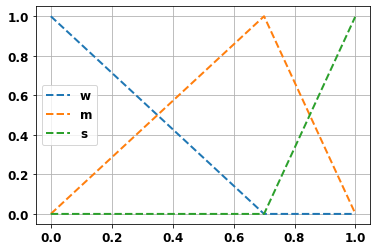

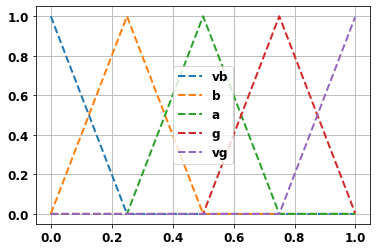

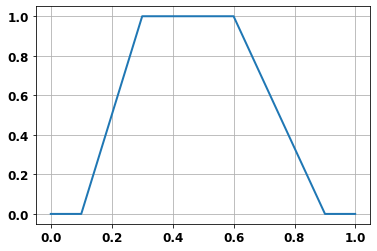

In [14]:
Fuzzification.wms().plot(linestyle='--');plt.grid()
Fuzzification.vbbagvg().plot(linestyle='--');plt.grid()
x = Fuzzification.trapezoid(z=np.arange(0,1,0.001),c_l=0.1,tc=0.3,Tc=0.6,c_u=0.9)
plt.figure()
plt.plot(np.arange(0,1,0.001),x);plt.grid()